# Claim 1 : Final graph - Bayesian analysis

In [2]:
import pandas as pd
import numpy as np

# make plot
from plotnine import ggplot, aes, geom_violin, coord_flip, geom_hline, \
                     position_dodge, xlab, ylab, geom_text, facet_wrap, \
                     geom_point, xlim, theme, element_text

# Improvement

## 1.1 Decision trees (DT)

In [48]:
classification_any = pd.read_csv("modelling/data/any-classification.csv")
regression_any = pd.read_csv("modelling/data/any-regression.csv")
regression_any["dataset"] += 8

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

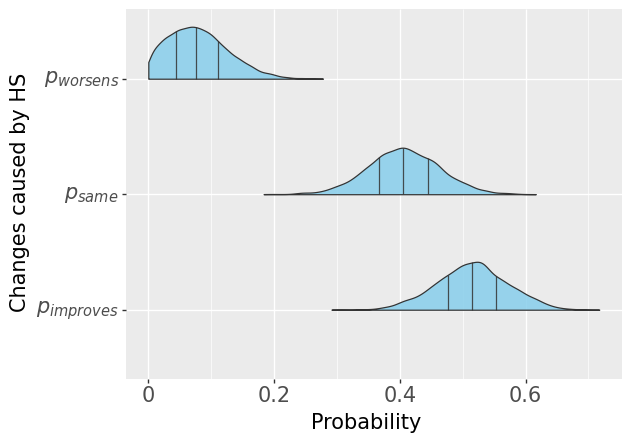

<ggplot: (8769988216754)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/any-dt.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [54]:
any = pd.concat([classification_any, regression_any])
any.to_csv("modelling/data/any.csv")

any = pd.read_csv("modelling/data/any-res.csv")
any = any[["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"]]

disp = pd.melt(any, value_vars=["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{improves}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"
disp.loc[disp.variable == "theta_upper[3]", "variable"] = "$p_{worsens}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Changes caused by HS")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/imp-dt.png", height = 5, width = 5, units = "in", dpi = 1000)

## 1.2 Random Forest (RF)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

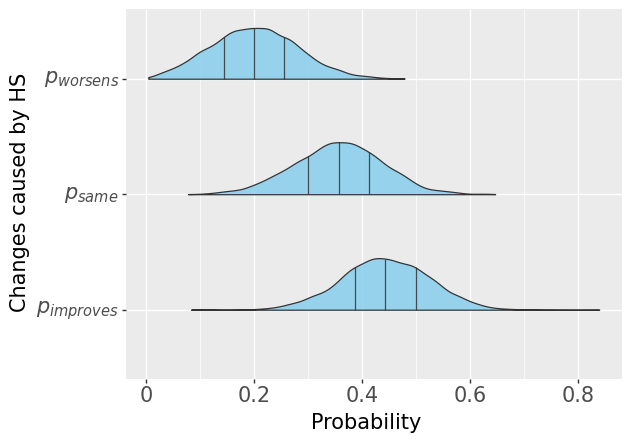

<ggplot: (8786532121802)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/imp-rf.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [3]:
any = pd.read_csv("modelling/data/any-rf-res.csv")
any = any[["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"]]

disp = pd.melt(any, value_vars=["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{improves}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"
disp.loc[disp.variable == "theta_upper[3]", "variable"] = "$p_{worsens}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Changes caused by HS")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/imp-rf.png", height = 5, width = 5, units = "in", dpi = 1000)

# Which is better ? 

## 1.1 Decision trees (DT)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

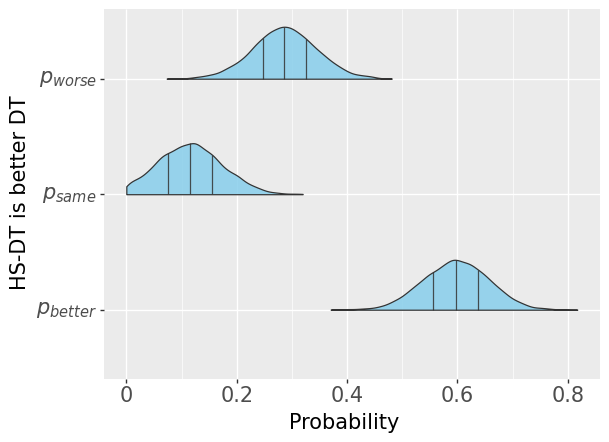

<ggplot: (8779223135031)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/rnd-dt.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [9]:
classification_random = pd.read_csv("modelling/data/random-classification.csv")
regression_random = pd.read_csv("modelling/data/random-regression.csv")
regression_random["dataset"] += 8

random = pd.concat([classification_random, regression_random])
random.to_csv("modelling/data/random.csv")

any = pd.read_csv("modelling/data/random-res.csv")
any = any[["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"]]

disp = pd.melt(any, value_vars=["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"
disp.loc[disp.variable == "theta_upper[3]", "variable"] = "$p_{worse}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("HS-DT is better DT")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/rnd-dt.png", height = 5, width = 5, units = "in", dpi = 1000)

## 1.2 Random Forest (RF)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

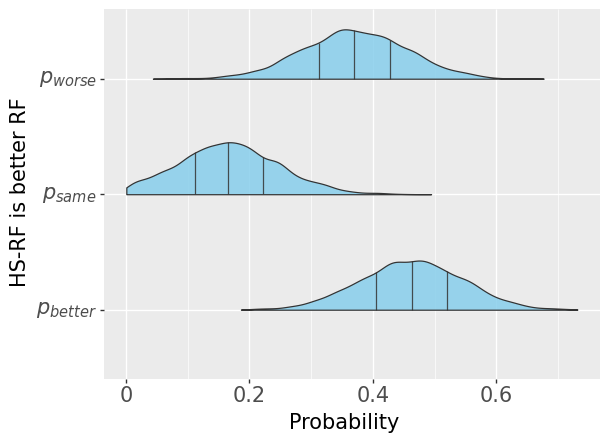

<ggplot: (8779192189556)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/rnd-rf.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [11]:
random = pd.read_csv("modelling/data/rf-random-res.csv")
random = random[["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"]]

disp = pd.melt(random, value_vars=["theta_upper[1]", "theta_upper[2]", "theta_upper[3]"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"
disp.loc[disp.variable == "theta_upper[3]", "variable"] = "$p_{worse}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("HS-RF is better RF")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/rnd-rf.png", height = 5, width = 5, units = "in", dpi = 1000)